# 딥러닝을 이용해서 이미지 분류

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib

In [2]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

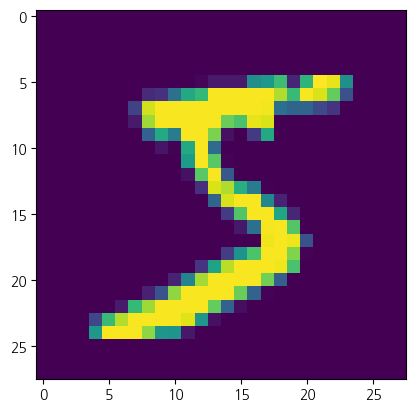

In [5]:
plt.imshow(X_train[0])

In [6]:
# 컴퓨터는 어떻게 이미지를 인식하는가?
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
# 0-255

In [8]:
X_train.shape[0]

60000

In [9]:
# 차원 변환 과정 보기
X_train = X_train.reshape(X_train.shape[0],784)

In [10]:
28 * 28

784

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
# 케라스에서 이미지 분석을 할 때 데이터를 0에서 1사이의 값으로 변환해야 분석이 잘 됨.
# 이미지 분석을 할 때 꼭 해주어야 하는 작업은 255로 나누어 주는 작업이 필수
# 이러한 작업을 데이터 정규화(nomalization)이라고 한다.
X_train = X_train.astype('float64')
X_train = X_train / 255

In [14]:
X_test = X_test.reshape(X_test.shape[0],784)
X_test = X_test.astype('float64')
X_test = X_test / 255

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train[4]

9

In [17]:
# 타겟이 카테고리형이어야 하기 때문에 숫자로 된 타겟 컬럼을 원핫인코딩 해줌
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

딥러닝을 이용한 mnist 손글씨 분석

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [20]:
X_train.shape[1]

784

In [21]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu')) # 2의 배수
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
pwd

'c:\\bigdata'

In [23]:
# 모델 최적화를 위한 설정
model_dir = "./model/"
if not os.path.exists(model_dir): # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath = "./model/MINIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [24]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.17671, saving model to ./model\MINIST_MLP.hdf5

Epoch 2: val_loss improved from 0.17671 to 0.12834, saving model to ./model\MINIST_MLP.hdf5

Epoch 3: val_loss improved from 0.12834 to 0.11213, saving model to ./model\MINIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11213 to 0.10776, saving model to ./model\MINIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10776 to 0.09333, saving model to ./model\MINIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09333 to 0.08640, saving model to ./model\MINIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08640 to 0.08132, saving model to ./model\MINIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08132

Epoch 9: val_loss improved from 0.08132 to 0.07947, saving model to ./model\MINIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.07947

Epoch 11: val_loss did not improve from 0.07947

Epoch 12: val_loss improved from 0.07947 to 0.07764, saving model to ./model\MINIST_MLP.hdf5

Epoch 13: val_loss 

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9809


[0.07382486015558243, 0.98089998960495]

In [26]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

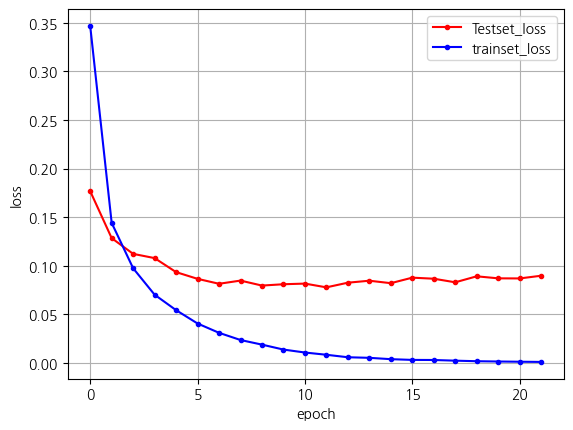

In [27]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 합성곱 신경망(convolution Neural Network) CNN
* 입력된 이미지에서 다시 한번 특징을 추출하기 위해서 커널(필터)을 이용해 이용하는 방법
* 원본 - 합성곱(특성추출, 차원축소)
* 풀링(특성추출, 차원축소)
* 플래튼(2차원 데이터를 1차원으로 변환)
* 은닉층과 연결(deep learning 연산)
* 드롭아웃(은닉층의 노드를 일부터 끔 - 과적합 방지)
* softmax, sigmoid로 분류 분석

In [28]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [29]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [31]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 최적화를 위한 설정
model_dir = "./model/"
if not os.path.exists(model_dir): # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath = "./model/MINIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [33]:
import tensorflow as tf
# 텐서가 어디에 할당 되어 있는지 확인
print(tf.debugging.set_log_device_placement(True))

None


In [34]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.07410, saving model to ./model\MINIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07410 to 0.05665, saving model to ./model\MINIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05665 to 0.05084, saving model to ./model\MINIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05084 to 0.04577, saving model to ./model\MINIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04577 to 0.04331, saving model to ./model\MINIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04331 to 0.04318, saving model to ./model\MINIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04318 to 0.04116, saving model to ./model\MINIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04116 to 0.04081, saving model to ./model\MINIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04081 to 0.04067, saving model to ./model\MINIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.04067

Epoch 11: val_loss did not improve from 0.04067

Epoch 12: val_loss did not improve from 0.04067

Epoch 13: val_loss 

313/313 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9925


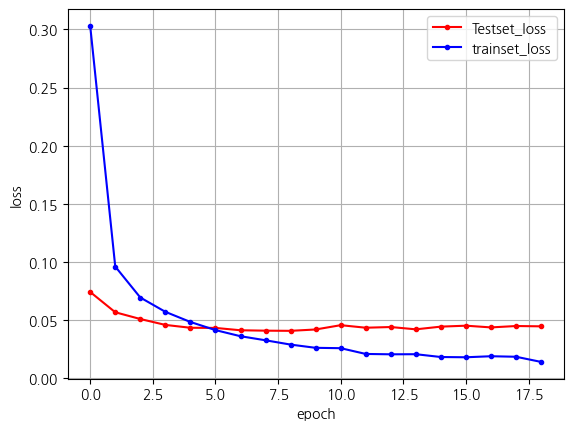

In [35]:
model.evaluate(X_test, y_test)
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()